In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
data_1=pd.read_csv(r"~/NN-test/CIFAR-10/output_10_1.csv",skiprows =1)
data_2=pd.read_csv(r"~/NN-test/CIFAR-10/output_10_2.csv",skiprows =1)
data_3=pd.read_csv(r"~/NN-test/CIFAR-10/output_10_3.csv",skiprows =1)
data_4=pd.read_csv(r"~/NN-test/CIFAR-10/output_10_4.csv",skiprows =1)


In [4]:
data_li=[data_1,data_2,data_3,data_4]
data_dict={}
j=0
for data in data_li:
    row_1=data.iloc[:,0]
    instructions_li=[list(data.columns)[0]]
    branches_li=[]
    branch_misses_li=[]
    page_faults_li=[]
    l1_icache_load_misses_li=[]
    llc_load_misses_li=[]
    llc_store_misses_li=[]
    itlb_load_misses_li=[]
    dtlb_load_misses_li=[]
    for i in range(9,len(row_1),10):
        instructions_li.append(row_1[i])
    for i in range(0,len(row_1),10):
        branches_li.append(row_1[i])
    for i in range(1,len(row_1),10):
        branch_misses_li.append(row_1[i])
    for i in range(2,len(row_1),10):
        page_faults_li.append(row_1[i])
    for i in range(3,len(row_1),10):
        l1_icache_load_misses_li.append(row_1[i])
    for i in range(4,len(row_1),10):
        llc_load_misses_li.append(row_1[i])
    for i in range(5,len(row_1),10):
        llc_store_misses_li.append(row_1[i])
    for i in range(6,len(row_1),10):
        itlb_load_misses_li.append(row_1[i])
    for i in range(7,len(row_1),10):
        dtlb_load_misses_li.append(row_1[i])
    data_dict[j]={"instructions":instructions_li,"branches":branches_li,"branch_misses":branch_misses_li,
                    "page_faults":page_faults_li,"l1_icache_load_misses":l1_icache_load_misses_li,
                    "llc_load_misses":llc_load_misses_li,"llc_store_misses":llc_store_misses_li,
                    "itlb_load_misses":itlb_load_misses_li,"dtlb_load_misses":dtlb_load_misses_li}
    j+=1

In [5]:
data_frames_li=[]
for k,v in data_dict.items():
    sample_df=pd.DataFrame({"Instructions":v["instructions"]}, columns=["Instructions"])
    sample_df["Branches"]=v["branches"]
    sample_df["Branch Misses"]=v["branch_misses"]
    sample_df["Page Faults"]=v["page_faults"]
    sample_df["L1 Ichache Load Misses"]=v["l1_icache_load_misses"]
    sample_df["LLc Load Misses"]=v["llc_load_misses"]
    sample_df["LLC Store Misses"]=v["llc_store_misses"]
    sample_df["Itlb Load Misses"]=v["itlb_load_misses"]
    sample_df["Dtlb Load Misses"]=v["dtlb_load_misses"]
    data_frames_li.append(sample_df)

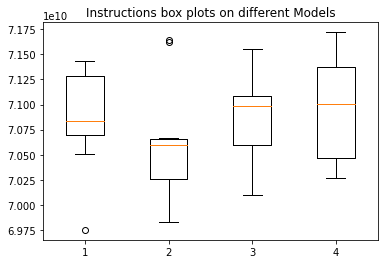

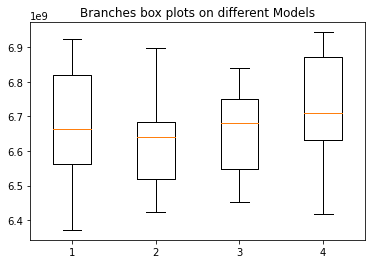

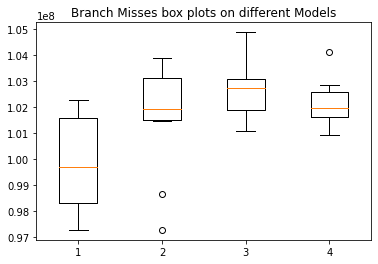

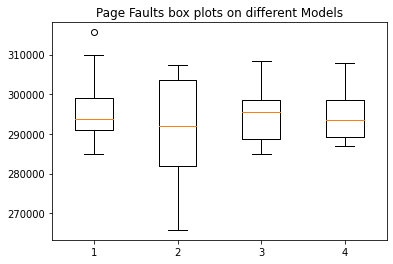

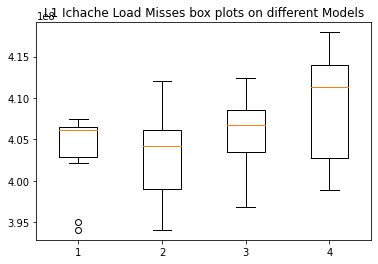

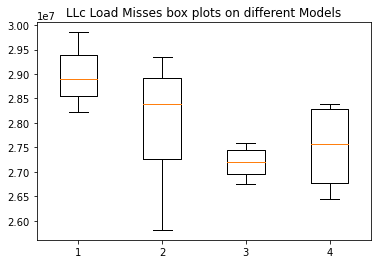

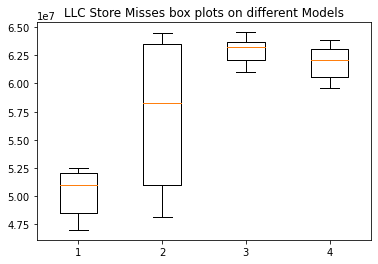

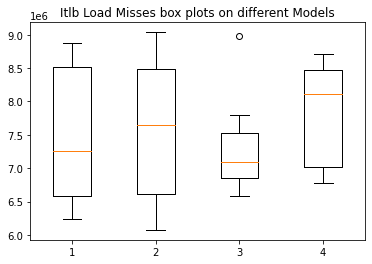

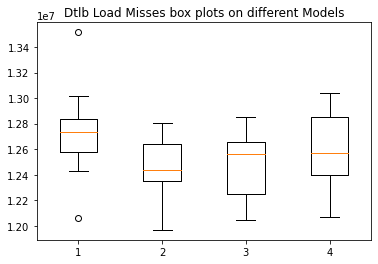

In [7]:
#branches box plot
params=["Instructions","Branches","Branch Misses","Page Faults","L1 Ichache Load Misses","LLc Load Misses","LLC Store Misses","Itlb Load Misses","Dtlb Load Misses"]
for k in range(0,9):
    clean_clean=list(data_frames_li[0].iloc[:,[k]][params[k]])
    clean_adversial=list(data_frames_li[1].iloc[:,[k]][params[k]])
    adversial_clean=list(data_frames_li[2].iloc[:,[k]][params[k]])
    adversial_adversial=list(data_frames_li[3].iloc[:,[k]][params[k]])
    df=pd.DataFrame({"clean_clean":clean_clean}, columns=[params[k]])
    df["clean_adversial"]=clean_adversial
    df["adversial_clean"]=adversial_clean
    df["adversial_adversial"]=adversial_adversial
    clean_clean_int=[]
    for ele in clean_clean:
        clean_clean_int.append(int(ele))
    clean_adversial_int=[]
    for ele in clean_adversial:
        clean_adversial_int.append(int(ele))
    adversial_clean_int=[]
    for ele in adversial_clean:
        adversial_clean_int.append(int(ele))
    adversial_adversial_int=[]
    for ele in adversial_adversial:
        adversial_adversial_int.append(int(ele))
    data=[clean_clean_int,clean_adversial_int,adversial_clean_int,adversial_adversial_int]
    fig7, ax7 = plt.subplots()
    ax7.set_title(params[k]+' box plots on different Models')
    ax7.boxplot(data)
    plt.show()
    fig7.savefig("plot"+str(k)+".jpeg",bbox_inches='tight')
    plt.close(fig7)